# Author : Sujit Mandal

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers

# Github: https://github.com/sujitmandal
# Pypi : https://pypi.org/user/sujitmandal/
# LinkedIn : https://www.linkedin.com/in/sujit-mandal-91215013a/

In [3]:
EPOCHS = 10
CHANNELS = 3
BATCH_SIZE = 32
IMAGE_SIZE = 256

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset",
    seed = 123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2475 files belonging to 2 classes.


In [5]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

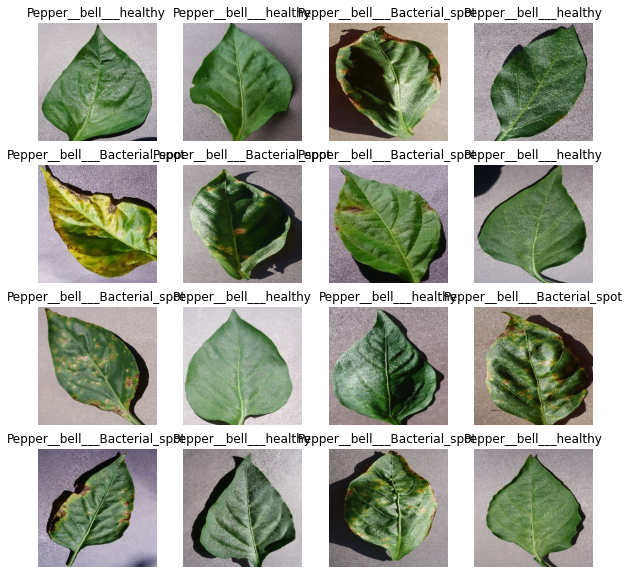

In [6]:
plt.figure(figsize=(10, 10))
for batch, label in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(batch[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [7]:
def split_dataset(dataset, train_split, val_split, test_split):
#     shuffle = True
#     shuffle_size = 10000
    assert(train_split + val_split + test_split) == 1

    dataset_size = len(dataset)

#     if shuffle:
#         dataset = dataset.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)

    train_dataset = dataset.take(train_size)
    val_dataset = dataset.skip(train_size).take(val_size)
    test_dataset = dataset.skip(train_size).skip(val_size)

    return(train_dataset, val_dataset, test_dataset)

In [8]:
train_split = 0.8
val_split = 0.1
test_split = 0.1

train_dataset, val_dataset, test_dataset = split_dataset(dataset, train_split, val_split, test_split)

In [9]:
print('Total dataset : {}'.format(len(dataset)))
print('Train dataset : {}'.format(len(train_dataset)))
print('Val dataset : {}'.format(len(val_dataset)))
print('Test dataset : {}'.format(len(test_dataset)))

Total dataset : 78
Train dataset : 62
Val dataset : 7
Test dataset : 9


# Cache, Shuffle, and Prefetch the Dataset

In [10]:
# train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Resizing and Normalization

In [11]:
data_resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

# Data Augmentation

In [12]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

# build CNN model

In [13]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
total_class = 2

model = models.Sequential([
    data_resize_rescale,
    data_augmentation,

    layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape= input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'), 
    layers.Dense(total_class, activation = 'softmax'),
])

model.build(input_shape=input_shape)

In [14]:
print('Model :')
model.summary()

Model :
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64) 

# compiling the model

In [15]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train the model

In [16]:
history = model.fit(
    train_dataset,
    batch_size = BATCH_SIZE,
    validation_data = val_dataset,
    verbose = 1,
    epochs = EPOCHS,
)

Epoch 1/10
62/62 [==============================] - 342s 5s/step - loss: 0.6423 - accuracy: 0.6162 - val_loss: 0.7478 - val_accuracy: 0.6295
Epoch 2/10
62/62 [==============================] - 242s 4s/step - loss: 0.3624 - accuracy: 0.8488 - val_loss: 0.1465 - val_accuracy: 0.9598
Epoch 3/10
62/62 [==============================] - 232s 4s/step - loss: 0.1498 - accuracy: 0.9491 - val_loss: 0.0959 - val_accuracy: 0.9821
Epoch 4/10
62/62 [==============================] - 235s 4s/step - loss: 0.0939 - accuracy: 0.9801 - val_loss: 0.0411 - val_accuracy: 0.9777
Epoch 5/10
62/62 [==============================] - 238s 4s/step - loss: 0.0870 - accuracy: 0.9743 - val_loss: 0.0442 - val_accuracy: 0.9777
Epoch 6/10
62/62 [==============================] - 255s 4s/step - loss: 0.0758 - accuracy: 0.9826 - val_loss: 0.0112 - val_accuracy: 0.9955
Epoch 7/10
62/62 [==============================] - 240s 4s/step - loss: 0.0403 - accuracy: 0.9857 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 8/10
62

In [18]:
model_score = model.evaluate(test_dataset)

9/9 [==============================] - 6s 384ms/step - loss: 0.0153 - accuracy: 0.9963


In [19]:
model_score

[0.015296896919608116, 0.9962546825408936]

In [21]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 62}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
import json

model_performance = history.history

print(json.dumps(model_performance, indent=4))

{
    "loss": [
        0.5755701661109924,
        0.30966442823410034,
        0.15544436872005463,
        0.0885874405503273,
        0.07782688736915588,
        0.05441436916589737,
        0.04962605983018875,
        0.04013926908373833,
        0.031941864639520645,
        0.024117758497595787
    ],
    "accuracy": [
        0.696068525314331,
        0.8785282373428345,
        0.9475806355476379,
        0.9803427457809448,
        0.9808467626571655,
        0.9904233813285828,
        0.9848790168762207,
        0.9909273982048035,
        0.9954637289047241,
        0.9954637289047241
    ],
    "val_loss": [
        0.7477635145187378,
        0.1464766561985016,
        0.09588608890771866,
        0.041148070245981216,
        0.044151101261377335,
        0.011177043430507183,
        0.013143652118742466,
        0.024387290701270103,
        0.01085165236145258,
        0.01410180889070034
    ],
    "val_accuracy": [
        0.6294642686843872,
        0.95982140

In [28]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

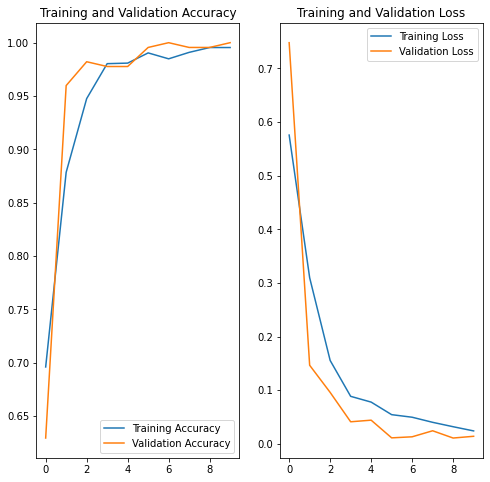

In [30]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Test model

Image to Predict :
Actual Lable :  Pepper__bell___healthy
Predicted Label :  Pepper__bell___healthy


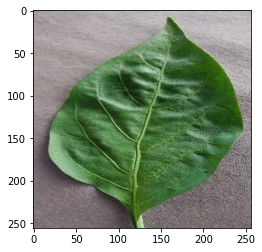

In [35]:
import numpy as np

for image_batch, labels in test_dataset.take(1):
    image = image_batch[0].numpy().astype("uint8")
    label = labels[0].numpy()
    
    print('Image to Predict :')
    plt.imshow(image)
    print('Actual Lable : ', class_names[label])
    
    batch_prediction = model.predict(image_batch)
    print('Predicted Label : ', class_names[np.argmax(batch_prediction[0])])

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return(predicted_class, confidence)

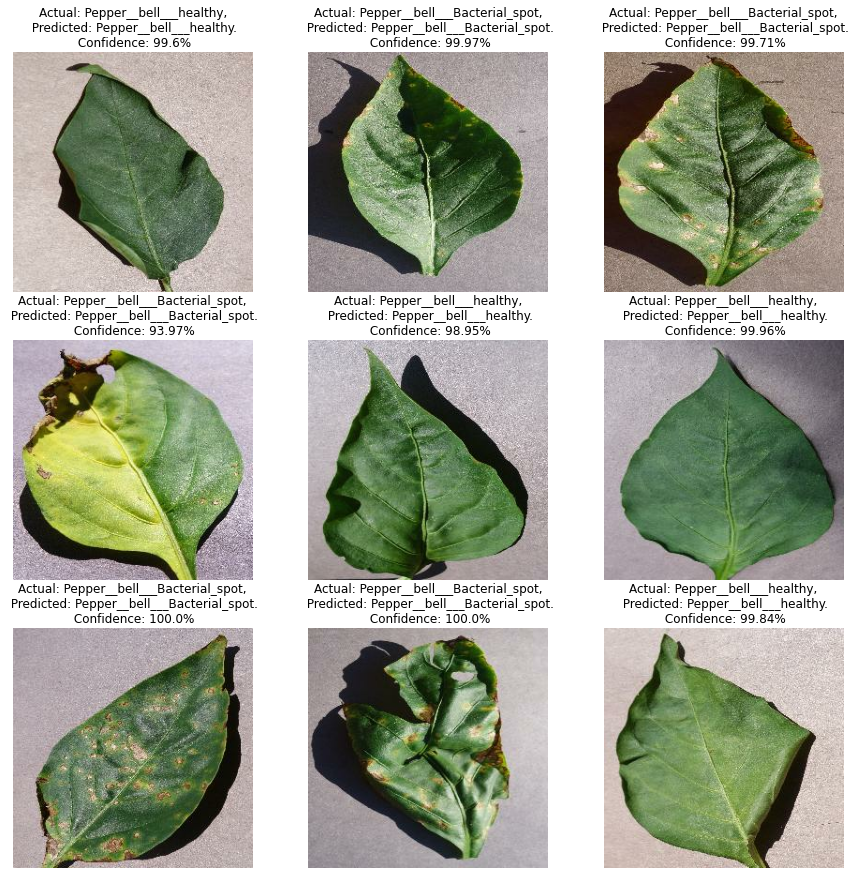

In [37]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [47]:
# import os
# model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
# model.save(f"../models/{model_version}")

In [51]:
model.save('models')

INFO:tensorflow:Assets written to: models/assets
